# Reski Saputra

# Task 1

## import library and data

In [1]:
# import library
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data
df = pd.read_csv('ingredient.csv')
df.head()

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


<AxesSubplot:>

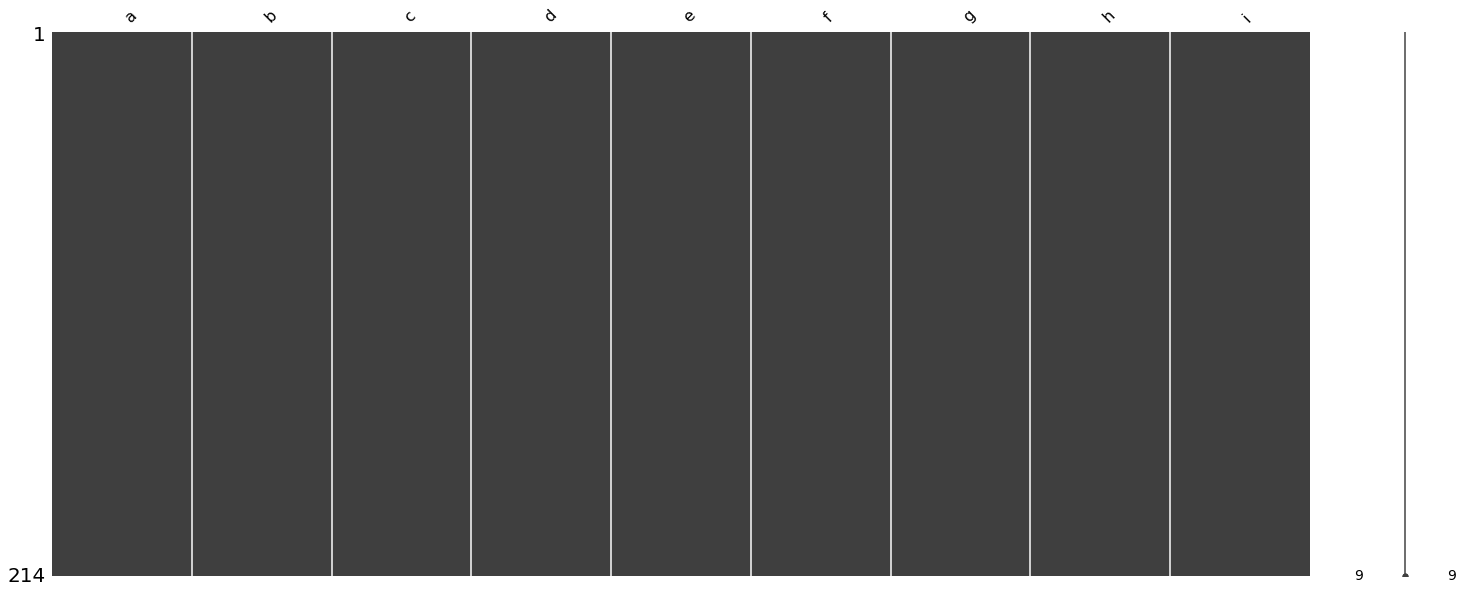

In [3]:
#check missing data
missingno.matrix(df)


### finding :
- no missing value at data

In [4]:
df.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


### finding :
- mean and median are quite close to eache other
- attributes a and i have low variance
- atrributes g and c have high variance

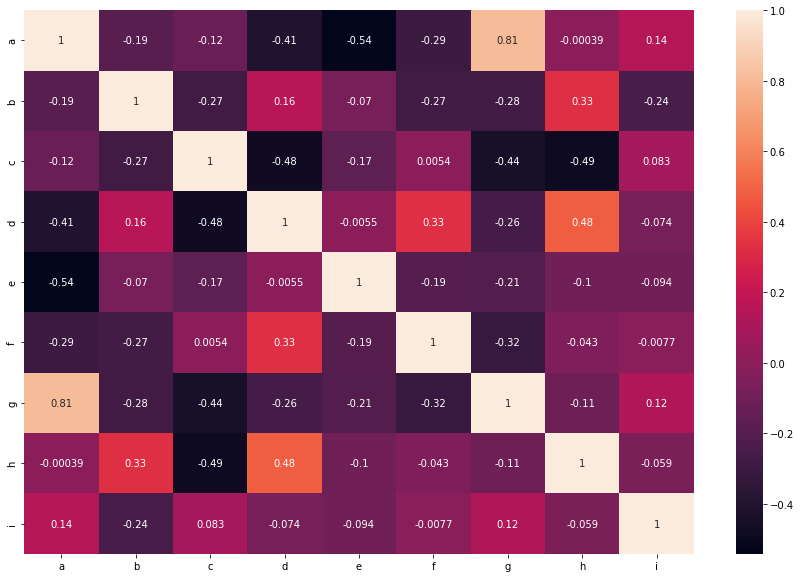

In [5]:
corr_matrix = df.corr(method='pearson')
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

### finding
- attribute a and g have high correlation
- attribute e and a have low correlation

## visualizing distributions of data

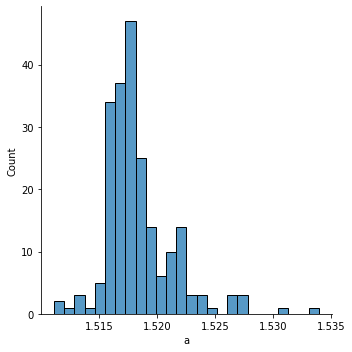

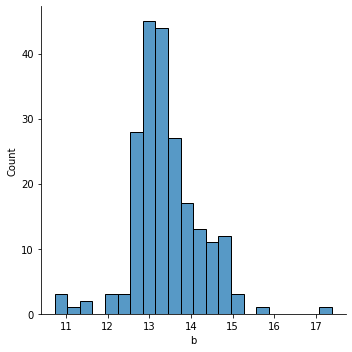

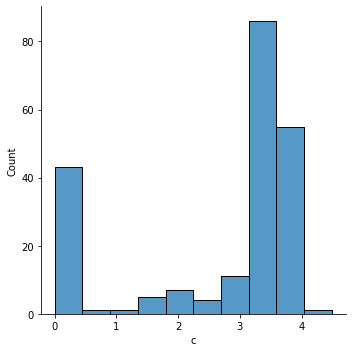

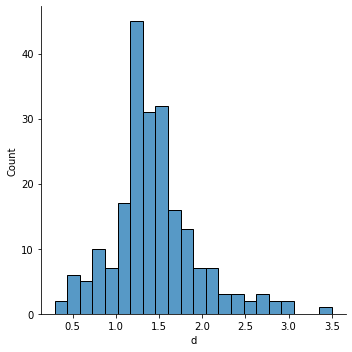

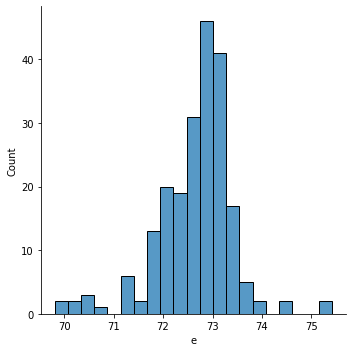

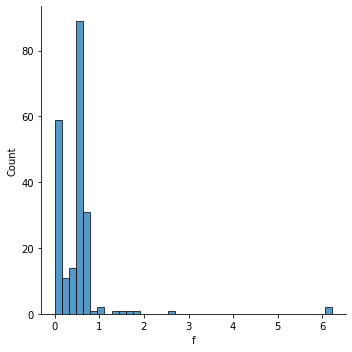

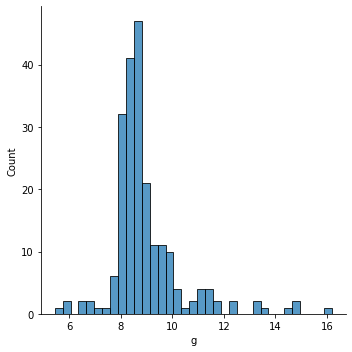

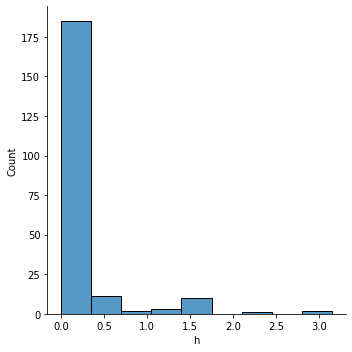

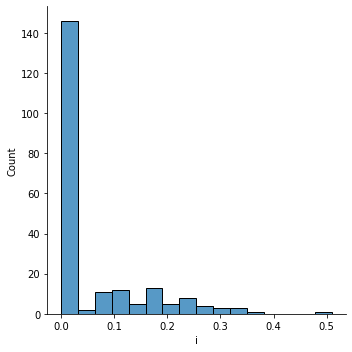

In [6]:
# data distribution
sns.displot(df['a'])
sns.displot(df['b'])
sns.displot(df['c'])
sns.displot(df['d'])
sns.displot(df['e'])
sns.displot(df['f'])
sns.displot(df['g'])
sns.displot(df['h'])
sns.displot(df['i'])

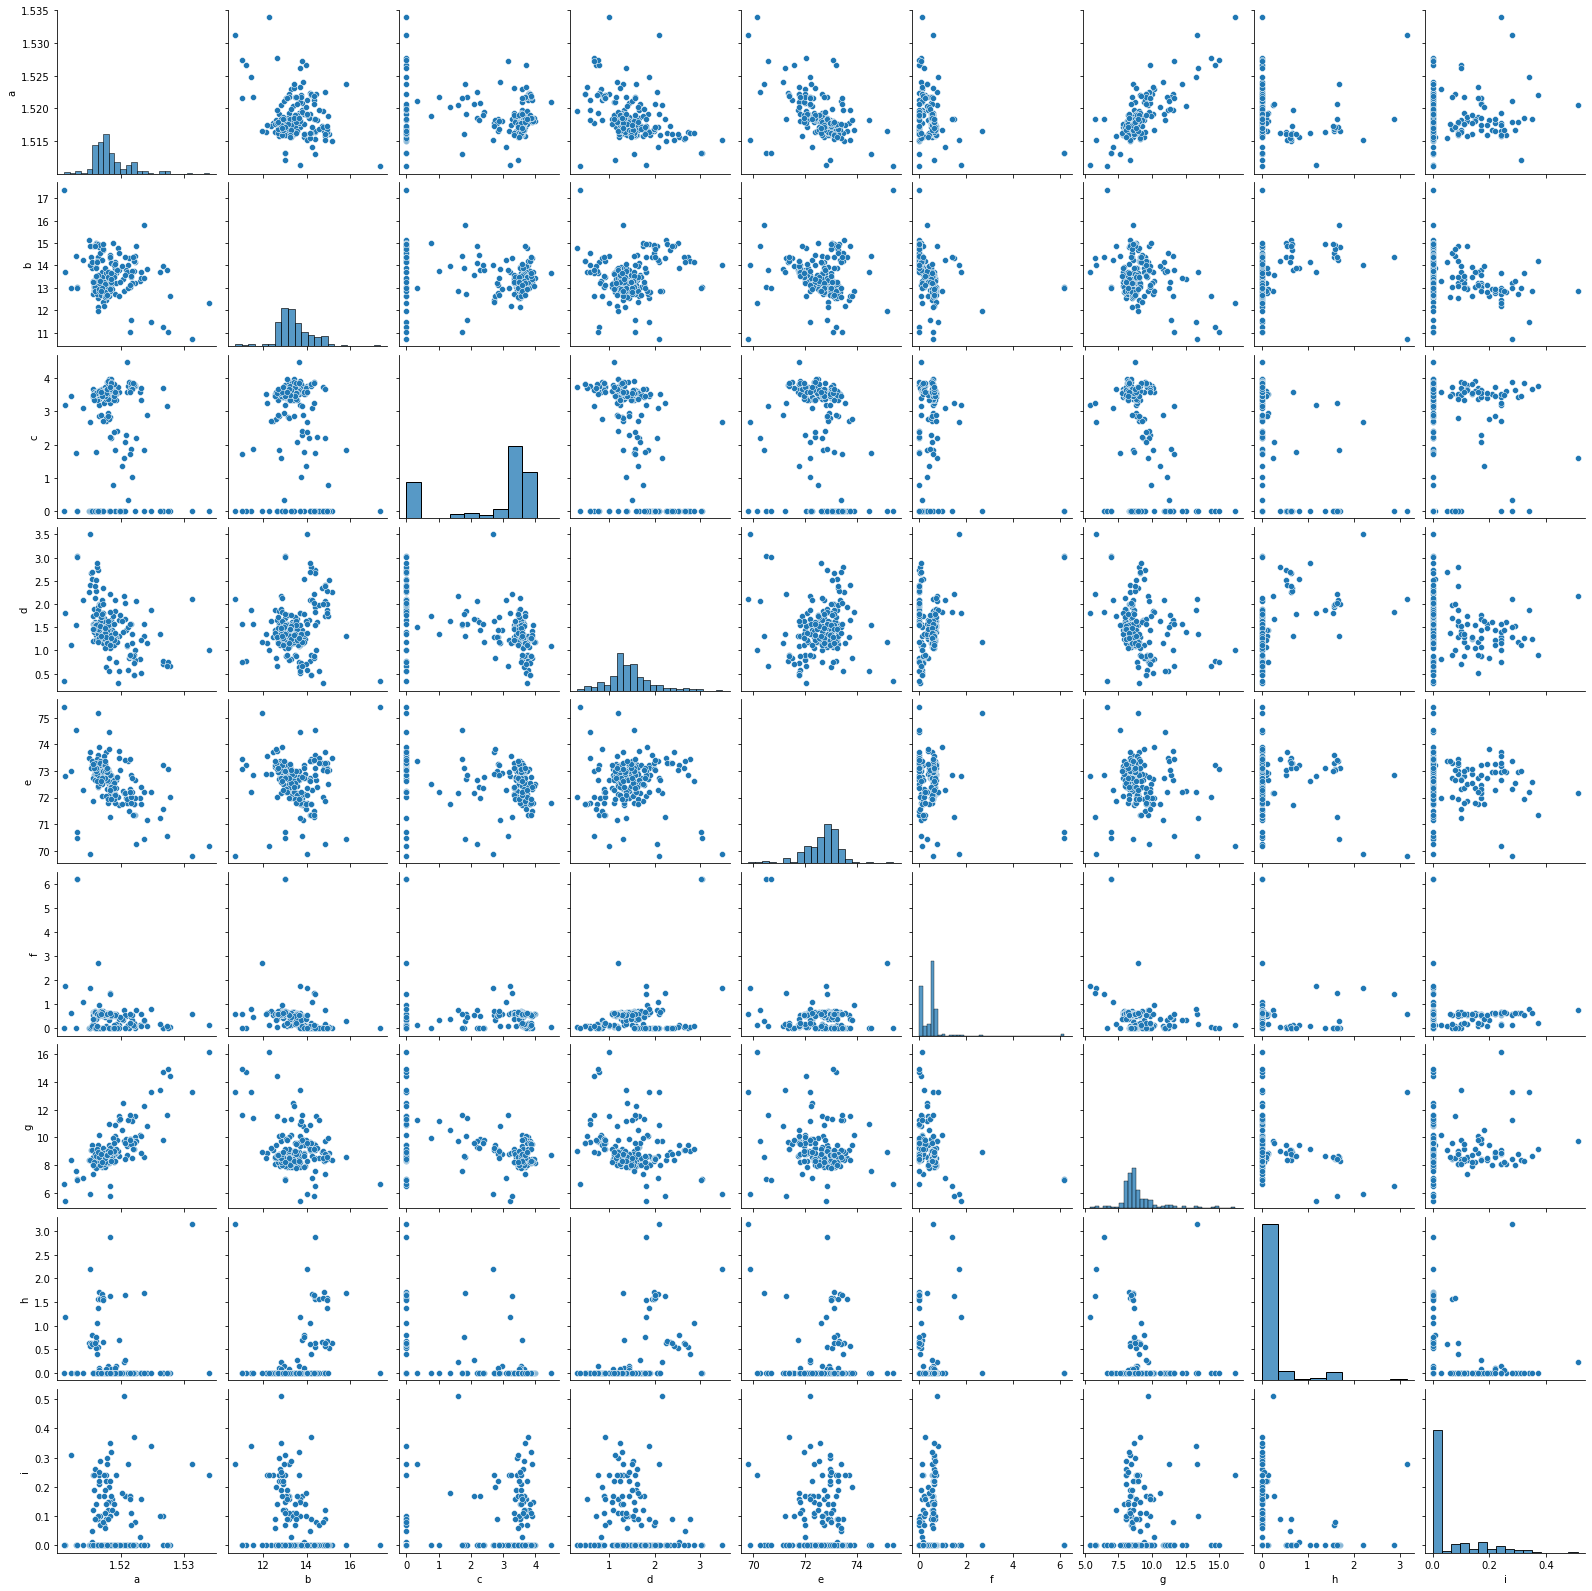

In [7]:
sns.pairplot(df)

### finding
- all data are normally distributed except for f, h, i.
- attributes a, d, f and g are right-skewed

## clustering with k-means

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

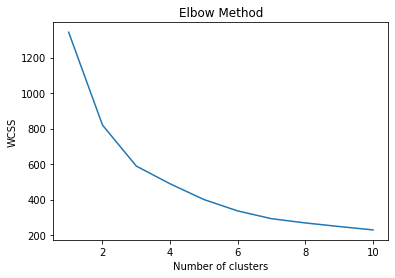

In [9]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

- searching the best k with elbow method
- k = 3

In [10]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=500, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df)
pred_y

array([1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       0, 1, 2, 2, 1, 0, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1,
       1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

In [11]:
df['predictions'] = pd.DataFrame(pred_y)
df.head()

,a,b,c,d,e,f,g,h,i,predictions
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07,1
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00,1
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00,1


In [12]:
df.predictions.value_counts(sort=False)

1    162
2     21
0     31
Name: predictions, dtype: int64

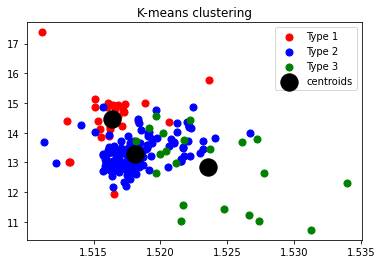

In [13]:
#visualize the clusters

plt.figure(2)
plt.scatter(df.iloc[pred_y == 0, 0], df.iloc[pred_y == 0, 1], s = 50, c = 'red', label = 'Type 1')
plt.scatter(df.iloc[pred_y == 1, 0], df.iloc[pred_y == 1, 1], s = 50, c = 'blue', label = 'Type 2')
plt.scatter(df.iloc[pred_y == 2, 0], df.iloc[pred_y == 2, 1], s = 50, c = 'green', label = 'Type 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'centroids' )

plt.title("K-means clustering")

plt.legend()
plt.show()